In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from dtaidistance import dtw

In [3]:
df1 = pd.read_csv("saved_data/dataset1.csv")

In [14]:
df1 = pd.read_csv("saved_data/dataset7.csv")
m = df1.recall_20
n = df1.precision_20
print("Precision & Recall:")
print(np.mean(n), np.mean(m))

Precision & Recall:
0.13460040820769847 0.9936182360267606


In [64]:
df1 = pd.read_csv("saved_data/dataset3.csv")
df2 = pd.read_csv("saved_data/dataset3x.csv")

df_combined = pd.DataFrame({
    'unique': df1['unique'],
    'density': df2['density'],
    'ACC': df2['clus_coeff']
})

In [44]:
correlation = df_combined.corr()
print("Correlation matrix:")
print(correlation)


Correlation matrix:
           unique   density
unique   1.000000  0.933841
density  0.933841  1.000000


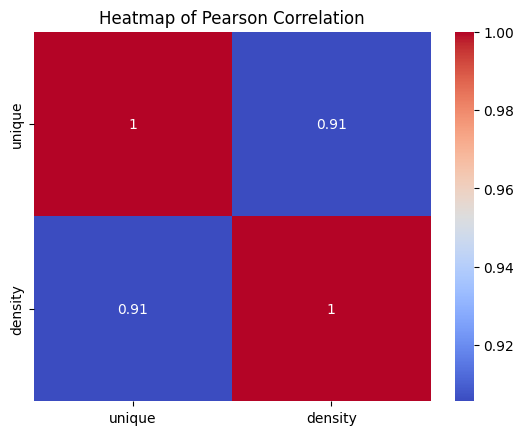

In [40]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Pearson Correlation')
plt.show()

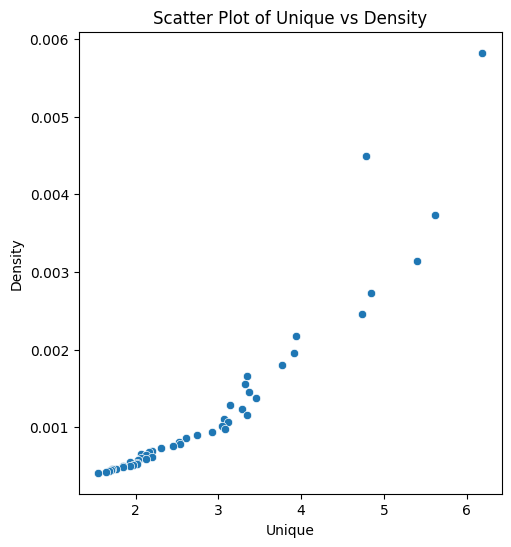

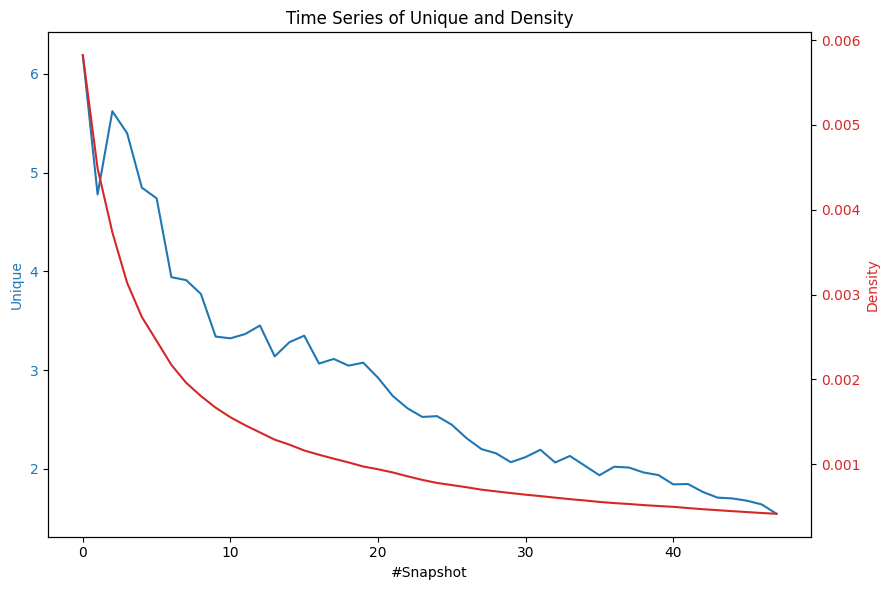

In [45]:
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='unique', y='density', data=df_combined)
plt.title('Scatter Plot of Unique vs Density')
plt.xlabel('Unique')
plt.ylabel('Density')

# Time series plot
fig, ax1 = plt.subplots(figsize=(9, 6))

# Plot the 'unique' time series on the left y-axis
ax1.set_xlabel('#Snapshot')
ax1.set_ylabel('Unique', color='tab:blue')
ax1.plot(df_combined.index, df_combined['unique'], label='Unique', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot the 'density' time series
ax2 = ax1.twinx()
ax2.set_ylabel('Density', color='tab:red')
ax2.plot(df_combined.index, df_combined['density'], label='Density', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title
plt.title('Time Series of Unique and Density')

plt.tight_layout()
plt.show()

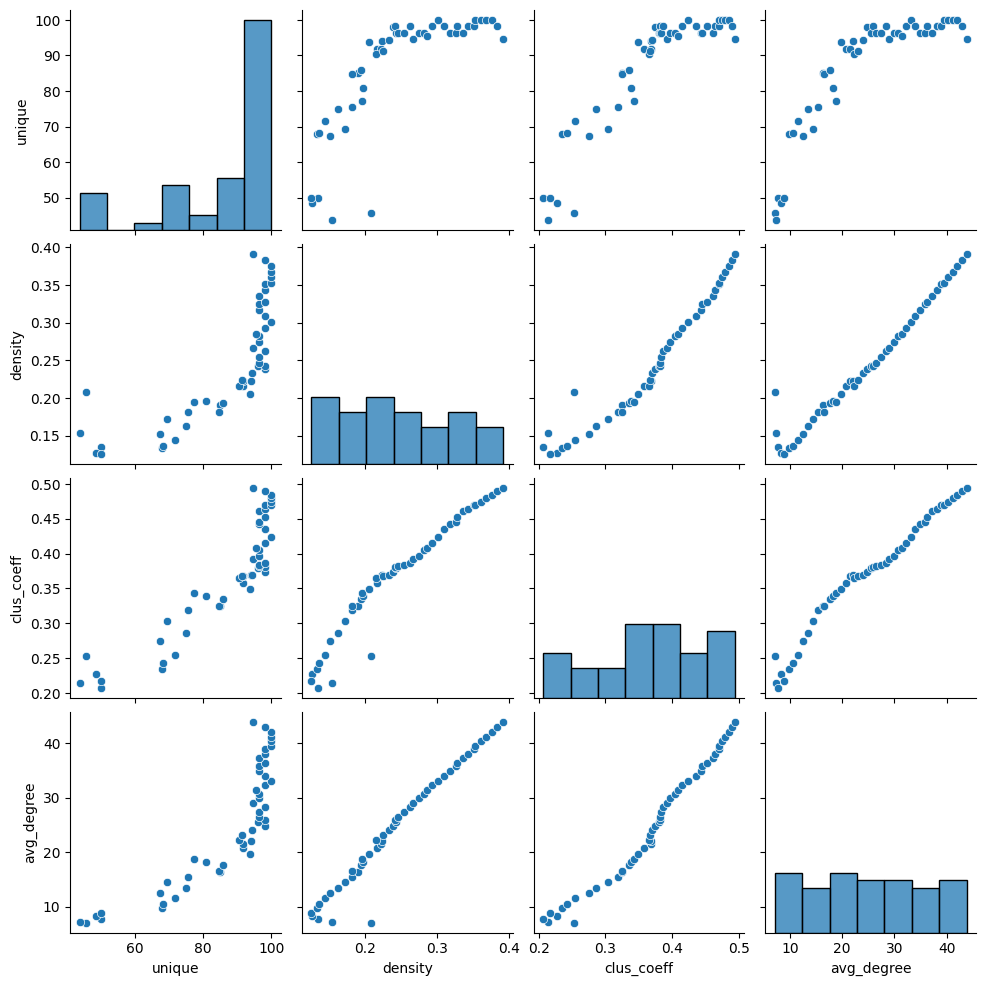

In [28]:
df_extended = pd.concat([df_combined, df2['clus_coeff'], df2['avg_degree']], axis=1)

# Pairplot to show pairwise relationships and distributions
sns.pairplot(df_extended)
#plt.title('Pairwise Correlations and Distributions')
plt.show()

In [35]:
decomposition = seasonal_decompose(df_combined['density'], model='additive', period=24)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

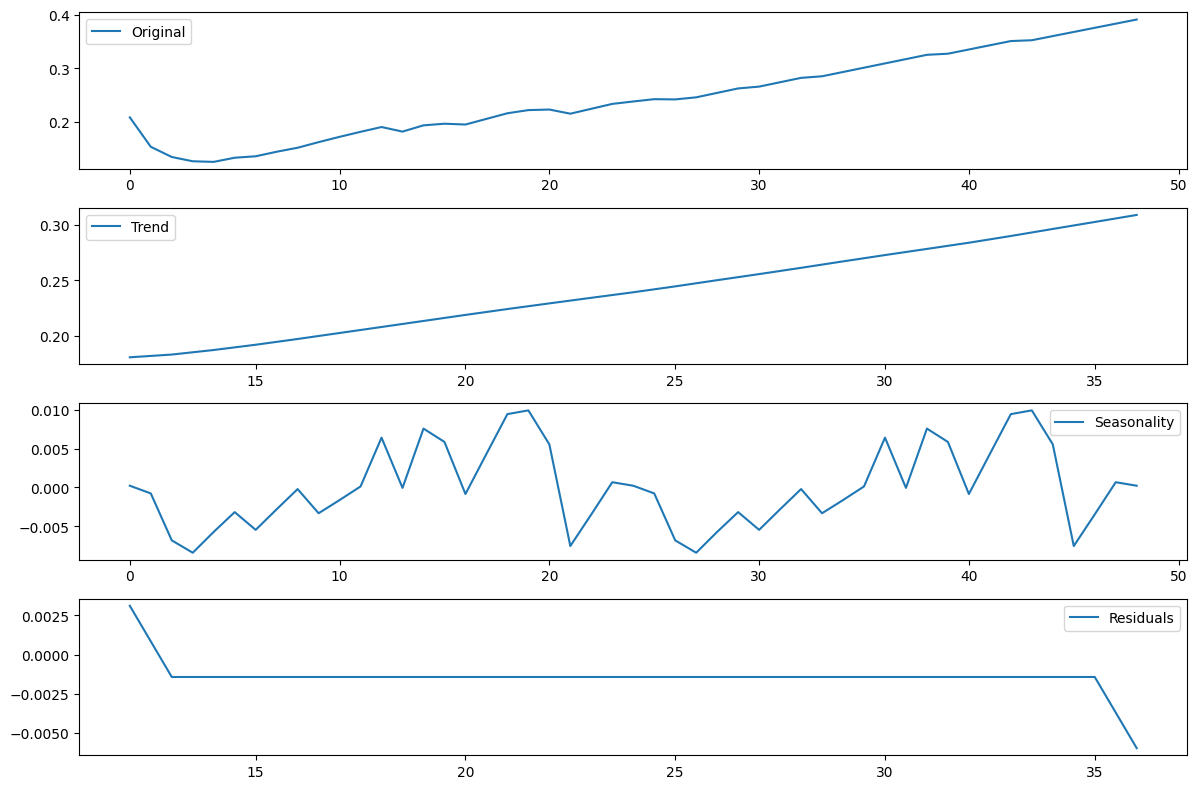

In [36]:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_combined['density'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

### Cross correlation

In [68]:
df1 = pd.read_csv("saved_data/dataset2.csv")
df2 = pd.read_csv("saved_data/dataset2p.csv")

df_combined = pd.DataFrame({
    'unique': df1['unique'],
    'density': df2['density'],
    'ACC': df2['clus_coeff']
})

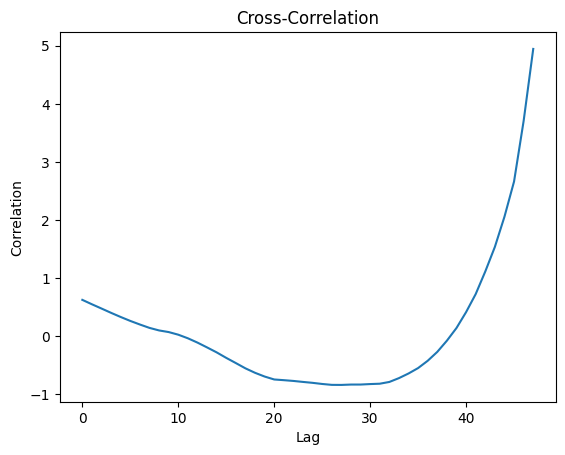

In [69]:
from statsmodels.tsa.stattools import ccf

cross_corr = ccf(df_combined['unique'], df_combined['ACC'])
lags = np.arange(len(cross_corr))

plt.plot(lags, cross_corr)
plt.title('Cross-Correlation')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

In [57]:
min_value1 = df_combined['unique'].min()
max_value1 = df_combined['unique'].max()

df_combined['unique_normalized'] = (df_combined['unique'] - min_value1) / (max_value1 - min_value1)

min_value2 = df_combined['density'].min()
max_value2 = df_combined['density'].max()

df_combined['density_normalized'] = (df_combined['density'] - min_value2) / (max_value2 - min_value2)

In [55]:
distance, paths = dtw.warping_paths(df_combined['unique_normalized'], df_combined['density_normalized'], use_c=False)
best_path = dtw.best_path(paths)
similarity_score = distance / len(best_path)

In [60]:
distance

21.300122209853612

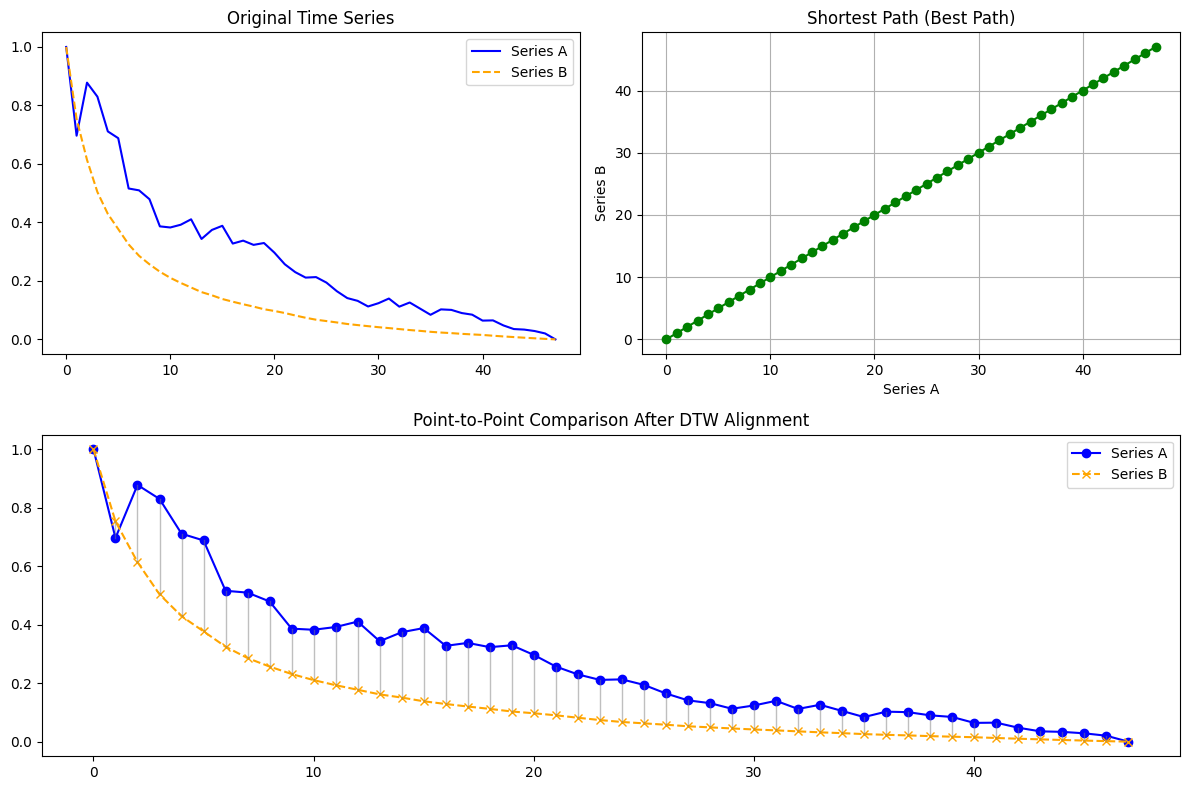

In [59]:
plt.figure(figsize=(12, 8))

# Original Time Series Plot
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(df_combined['unique_normalized'], label='Series A', color='blue')
ax1.plot(df_combined['density_normalized'], label='Series B', linestyle='--',color='orange')
ax1.set_title('Original Time Series')
ax1.legend()

# Shortest Path Plot (Cost Matrix with the path)
# In this example, only the path is plotted, not the entire cost matrix.

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(np.array(best_path)[:, 0], np.array(best_path)[:, 1], 'green', marker='o', linestyle='-')
ax2.set_title('Shortest Path (Best Path)')
ax2.set_xlabel('Series A')
ax2.set_ylabel('Series B')
ax2.grid(True)

# Point-to-Point Comparison Plot
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3.plot(df_combined['unique_normalized'], label='Series A', color='blue', marker='o')
ax3.plot(df_combined['density_normalized'], label='Series B', color='orange', marker='x', linestyle='--')
for a, b in best_path:
    ax3.plot([a, b], [df_combined['unique_normalized'][a], df_combined['density_normalized'][b]], color='grey', linestyle='-', linewidth=1, alpha = 0.5)
ax3.set_title('Point-to-Point Comparison After DTW Alignment')
ax3.legend()

plt.tight_layout()
plt.show()